# Laurenz Tolentino

Enter the number of clusters (1-5)
3
Enter full/elkan
full
k_means has been called
Freq from kmeans: 504
Freq from validation: 1454
Freq from spectral: 0
Total freq count: 1958
Expected BigO/FreqCount for Lloyd/full
O(knt) = 3*99*6 = 1782
len:  102


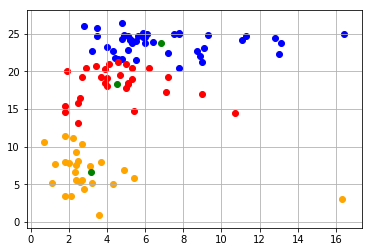

In [2]:
# FILE READING


import csv
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# from sklearn.cluster.k_means_ import freq as freqme
from sklearn.cluster.k_means_ import printfrequency as kmeanfreq
from sklearn.cluster.k_means_ import getfreq as kmeangetfreq
from sklearn.utils.validation import printfreq as validfreq
from sklearn.utils.validation import getfreq as validgetfreq
from sklearn.cluster.spectral import printfreq as spectralfreq
from sklearn.cluster.k_means_ import getlloyditer as lloyditer

#practice of reading files
def read_me():
    sampleFile = open('smalldata.csv', 'rb')
    reader = csv.reader(sampleFile)


def usewith(nclusters, algotype):
    clust1 = []
    clusterpoints = []
    # acquire data from csv
    with open('smalldata.csv') as smalldata:
        newReader = csv.reader(smalldata)
        for row in newReader:
            if row[0] !=  "\ufeffCLOSEST_DEF":
                clust1.append(row)
    # set the points
    points = np.array(clust1)
    # start kmeans processing
    kmeans = KMeans(n_clusters=nclusters, random_state=np.random, algorithm=algotype)
    kmeans.fit(points)
    # print the freq count per class (kmeans, validations, etc)
    kmeanfreq()
    validfreq()
    spectralfreq()
    totalfreq = kmeangetfreq() + validgetfreq()
    # print total freq
    print("Total freq count: " + str(totalfreq))
    # print expected range of freq count
    if algotype == "full":
        print("Expected BigO/FreqCount for Lloyd/full")
        print("O(knt) = " + str(nclusters) + "*" + str(len(points)) +
              "*" + str(lloyditer()) + " = " + str(nclusters*len(points)*lloyditer()))
    else:
        print("Expected BigO for Elkan")
        print("From O() = ")
    for i in range(len(points)):
        point = points[i]
        label = kmeans.labels_[i]
        clusterpoints.append([float(point[0]), float(point[1]), label])
    for centers in kmeans.cluster_centers_:
        clusterpoints.append([float(centers[0]), float(centers[1]), 99])

    # print(kmeans.labels_)
    # print(kmeans.cluster_centers_)
    return clusterpoints


def colorchoices(x):
    return {
        0: 'red',
        1: 'blue',
        2: 'orange',
        3: 'pink',
        4: 'cyan',
        5: 'teal',
        99: 'green'
    }[x]


def startclustering():
    print("Enter the number of clusters (1-5)")
    num = input()
    print("Enter full/elkan")
    algotype = input()
    clusterpoints = usewith(int(num), str(algotype))
    fig, ax = plt.subplots()
    print("len: ", len(clusterpoints))
    for i in range(len(clusterpoints)):
        point = clusterpoints[i]
        x = point[0]
        y = point[1]
        z = point[2]
        color = colorchoices(z)
        ax.scatter(x, y, c=color)
    ax.grid(True)
    plt.show()


def testmatplot():
    fig, ax = plt.subplots()
    for color in ['red', 'green', 'blue']:
        n = 100
        x, y = rand(2, n)
        scale = 200.0 * rand(n)
        ax.scatter(x, y, c=color, s=scale, label=color,alpha=0.3, edgecolors='none')
    ax.legend()
    ax.grid(True)
    plt.show()


# Run your crap below
# createscatter()
startclustering()
